In [1]:
import torch
import torchvision
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_set = torchvision.datasets.MNIST(
    root='data', transform=torchvision.transforms.ToTensor(), train=True, download=True
)


In [4]:
batch_size = 256

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [5]:
class Generator(torch.nn.Module):
    def __init__(self, indim, outdim=28*28):
        super(Generator, self).__init__()
        
        self.gen = torch.nn.Sequential(
            self.unit(indim, 128, batch_norm=True),
            self.unit(128, 256, batch_norm=True),
            self.unit(256, 512, batch_norm=True),
            self.unit(512, 1024, batch_norm=True),
            self.unit(1024, 2048, batch_norm=True),
            torch.nn.Linear(2048, outdim),
            torch.nn.Sigmoid()
        )
    
    def unit(self, indim, outdim, batch_norm=False):
        if batch_norm:
            return torch.nn.Sequential(
                torch.nn.Linear(indim, outdim),
                torch.nn.BatchNorm1d(outdim),
                torch.nn.ReLU(inplace=True)
            )
        else:
            return torch.nn.Sequential(
                torch.nn.Linear(indim, outdim),
                torch.nn.ReLU(inplace=True)
            )
        
    def forward(self, noise):
        return self.gen(noise)
    

class Discriminator(torch.nn.Module):
    def __init__(self, indim=28*28):
        super(Discriminator, self).__init__()
        
        self.disc = torch.nn.Sequential(
            self.unit(indim, 512, batch_norm=False),
            self.unit(512, 256, batch_norm=False),
            self.unit(256, 128, batch_norm=False),
            self.unit(128, 64, batch_norm=False),
            torch.nn.Linear(64, 1),
        )
        
    def unit(self, indim, outdim, batch_norm=False):
        if batch_norm:
            return torch.nn.Sequential(
                torch.nn.Linear(indim, outdim),
                torch.nn.BatchNorm1d(outdim),
                torch.nn.LeakyReLU(0.2, inplace=True)
            )
        else:
            return torch.nn.Sequential(
                torch.nn.Linear(indim, outdim),
                torch.nn.Dropout(0.5),
                torch.nn.LeakyReLU(0.2, inplace=True)
            )
        
    def forward(self, image):
        return self.disc(image)

In [6]:
def disc_loss_fn(disc_model, real, fake, criterion):
    # Real Image
    real_preds = disc_model(real)
    real_loss = criterion(real_preds, torch.ones_like(real_preds))
    
    # Fake Image
    fake_preds = disc_model(fake.detach())
    fake_loss = criterion(fake_preds, torch.zeros_like(fake_preds))
    
    return real_loss + fake_loss

def gen_loss_fn(gen_model, disc_model, noise, criterion):
    fake = gen_model(noise)
    fake_preds = disc_model(fake)
    fake_loss = criterion(fake_preds, torch.ones_like(fake_preds))
    
    return fake_loss, fake

def random_noise(batch_size, dim=10, device='cuda'):
    return torch.randn(batch_size, dim, device=device)

In [7]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = torchvision.utils.make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.axis('off')
    plt.show()

Epoch:   10/2000 | G Loss: 1.205 | D Loss: 0.7832
Epoch:   20/2000 | G Loss: 1.4944 | D Loss: 0.82911
Epoch:   30/2000 | G Loss: 1.611 | D Loss: 0.80166
Epoch:   40/2000 | G Loss: 1.8214 | D Loss: 0.65648
Epoch:   50/2000 | G Loss: 1.7664 | D Loss: 0.76607
Epoch:   60/2000 | G Loss: 1.7 | D Loss: 0.73009
Epoch:   70/2000 | G Loss: 1.6249 | D Loss: 0.77646
Epoch:   80/2000 | G Loss: 1.613 | D Loss: 0.77901
Epoch:   90/2000 | G Loss: 1.4225 | D Loss: 0.89817


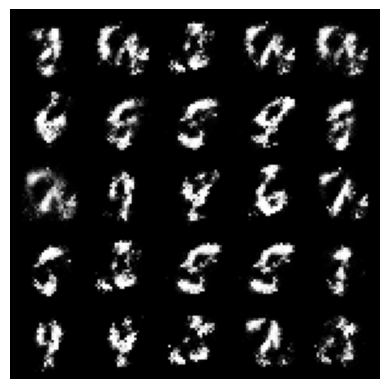

Epoch:  100/2000 | G Loss: 1.4113 | D Loss: 0.84604
Epoch:  110/2000 | G Loss: 1.2906 | D Loss: 0.96024
Epoch:  120/2000 | G Loss: 1.287 | D Loss: 0.99179
Epoch:  130/2000 | G Loss: 1.1818 | D Loss: 1.0551
Epoch:  140/2000 | G Loss: 1.1484 | D Loss: 1.0758
Epoch:  150/2000 | G Loss: 1.0149 | D Loss: 1.1042
Epoch:  160/2000 | G Loss: 0.93408 | D Loss: 1.3152
Epoch:  170/2000 | G Loss: 1.0263 | D Loss: 1.0413
Epoch:  180/2000 | G Loss: 0.95103 | D Loss: 1.1713
Epoch:  190/2000 | G Loss: 0.89614 | D Loss: 1.1959


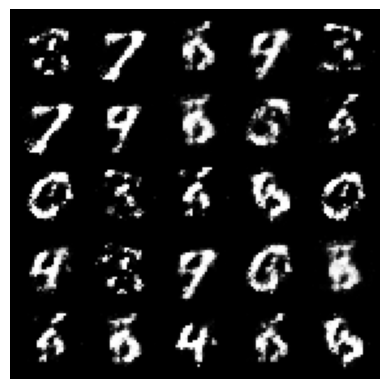

Epoch:  200/2000 | G Loss: 0.92798 | D Loss: 1.282
Epoch:  210/2000 | G Loss: 0.82871 | D Loss: 1.3131
Epoch:  220/2000 | G Loss: 0.8217 | D Loss: 1.2872
Epoch:  230/2000 | G Loss: 0.79577 | D Loss: 1.27
Epoch:  240/2000 | G Loss: 0.81394 | D Loss: 1.3946
Epoch:  250/2000 | G Loss: 0.75483 | D Loss: 1.4077
Epoch:  260/2000 | G Loss: 0.71792 | D Loss: 1.3823
Epoch:  270/2000 | G Loss: 0.70291 | D Loss: 1.3585
Epoch:  280/2000 | G Loss: 0.73098 | D Loss: 1.3913
Epoch:  290/2000 | G Loss: 0.71346 | D Loss: 1.3921


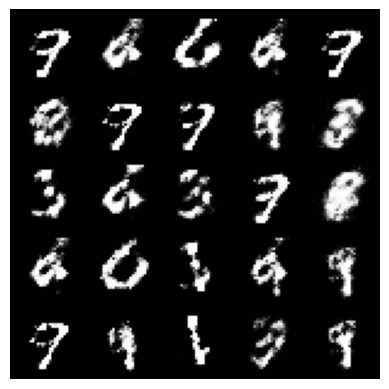

Epoch:  300/2000 | G Loss: 0.72628 | D Loss: 1.3702
Epoch:  310/2000 | G Loss: 0.70893 | D Loss: 1.3847
Epoch:  320/2000 | G Loss: 0.71465 | D Loss: 1.3901
Epoch:  330/2000 | G Loss: 0.68247 | D Loss: 1.3566
Epoch:  340/2000 | G Loss: 0.73273 | D Loss: 1.385
Epoch:  350/2000 | G Loss: 0.70608 | D Loss: 1.3864
Epoch:  360/2000 | G Loss: 0.72808 | D Loss: 1.3736
Epoch:  370/2000 | G Loss: 0.72366 | D Loss: 1.3756
Epoch:  380/2000 | G Loss: 0.69484 | D Loss: 1.3817
Epoch:  390/2000 | G Loss: 0.71843 | D Loss: 1.3914


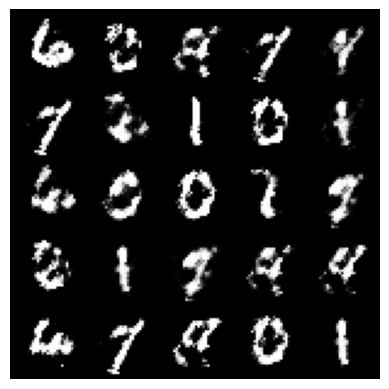

Epoch:  400/2000 | G Loss: 0.69409 | D Loss: 1.3657
Epoch:  410/2000 | G Loss: 0.71341 | D Loss: 1.3805
Epoch:  420/2000 | G Loss: 0.73122 | D Loss: 1.3872
Epoch:  430/2000 | G Loss: 0.68953 | D Loss: 1.3769
Epoch:  440/2000 | G Loss: 0.7232 | D Loss: 1.3781
Epoch:  450/2000 | G Loss: 0.70517 | D Loss: 1.3836
Epoch:  460/2000 | G Loss: 0.74456 | D Loss: 1.3941
Epoch:  470/2000 | G Loss: 0.68408 | D Loss: 1.3599
Epoch:  480/2000 | G Loss: 0.71116 | D Loss: 1.3851
Epoch:  490/2000 | G Loss: 0.70071 | D Loss: 1.3689


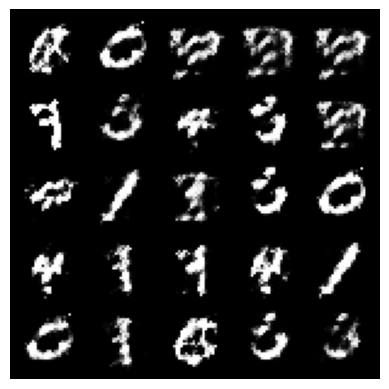

Epoch:  500/2000 | G Loss: 0.68596 | D Loss: 1.3523
Epoch:  510/2000 | G Loss: 0.70812 | D Loss: 1.3574
Epoch:  520/2000 | G Loss: 0.69928 | D Loss: 1.3813
Epoch:  530/2000 | G Loss: 0.70023 | D Loss: 1.3957
Epoch:  540/2000 | G Loss: 0.71262 | D Loss: 1.3579
Epoch:  550/2000 | G Loss: 0.71197 | D Loss: 1.3859
Epoch:  560/2000 | G Loss: 0.70949 | D Loss: 1.3838
Epoch:  570/2000 | G Loss: 0.69847 | D Loss: 1.3724
Epoch:  580/2000 | G Loss: 0.70927 | D Loss: 1.3556
Epoch:  590/2000 | G Loss: 0.70486 | D Loss: 1.3874


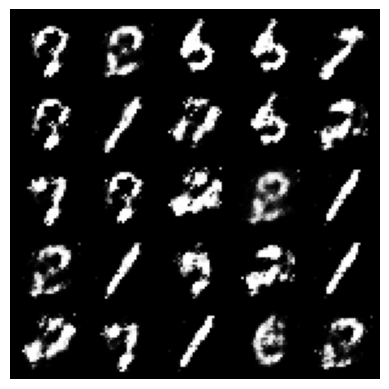

Epoch:  600/2000 | G Loss: 0.697 | D Loss: 1.3762
Epoch:  610/2000 | G Loss: 0.71984 | D Loss: 1.3727
Epoch:  620/2000 | G Loss: 0.69295 | D Loss: 1.4002
Epoch:  630/2000 | G Loss: 0.72175 | D Loss: 1.3849
Epoch:  640/2000 | G Loss: 0.70605 | D Loss: 1.372
Epoch:  650/2000 | G Loss: 0.71167 | D Loss: 1.3954
Epoch:  660/2000 | G Loss: 0.71927 | D Loss: 1.3912
Epoch:  670/2000 | G Loss: 0.69841 | D Loss: 1.3619
Epoch:  680/2000 | G Loss: 0.70735 | D Loss: 1.3793
Epoch:  690/2000 | G Loss: 0.71978 | D Loss: 1.377


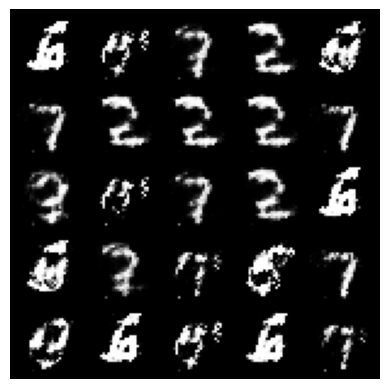

Epoch:  700/2000 | G Loss: 0.69899 | D Loss: 1.3874
Epoch:  710/2000 | G Loss: 0.69982 | D Loss: 1.3778
Epoch:  720/2000 | G Loss: 0.70116 | D Loss: 1.371
Epoch:  730/2000 | G Loss: 0.70611 | D Loss: 1.3866
Epoch:  740/2000 | G Loss: 0.71716 | D Loss: 1.384
Epoch:  750/2000 | G Loss: 0.70278 | D Loss: 1.3972
Epoch:  760/2000 | G Loss: 0.7028 | D Loss: 1.3864
Epoch:  770/2000 | G Loss: 0.68394 | D Loss: 1.3833
Epoch:  780/2000 | G Loss: 0.68952 | D Loss: 1.3937
Epoch:  790/2000 | G Loss: 0.70509 | D Loss: 1.3872


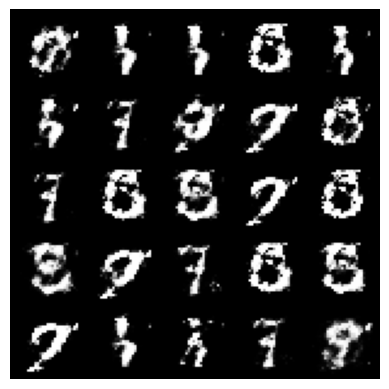

Epoch:  800/2000 | G Loss: 0.69432 | D Loss: 1.3833
Epoch:  810/2000 | G Loss: 0.69174 | D Loss: 1.3844
Epoch:  820/2000 | G Loss: 0.70887 | D Loss: 1.3943
Epoch:  830/2000 | G Loss: 0.69509 | D Loss: 1.3891
Epoch:  840/2000 | G Loss: 0.69914 | D Loss: 1.3891
Epoch:  850/2000 | G Loss: 0.70663 | D Loss: 1.3789
Epoch:  860/2000 | G Loss: 0.70486 | D Loss: 1.387
Epoch:  870/2000 | G Loss: 0.70409 | D Loss: 1.3905
Epoch:  880/2000 | G Loss: 0.71411 | D Loss: 1.3918
Epoch:  890/2000 | G Loss: 0.70677 | D Loss: 1.3691


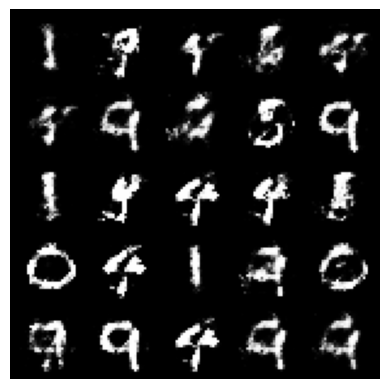

Epoch:  900/2000 | G Loss: 0.68233 | D Loss: 1.3762
Epoch:  910/2000 | G Loss: 0.72284 | D Loss: 1.3732
Epoch:  920/2000 | G Loss: 0.68838 | D Loss: 1.3673
Epoch:  930/2000 | G Loss: 0.70186 | D Loss: 1.3794
Epoch:  940/2000 | G Loss: 0.70163 | D Loss: 1.3682
Epoch:  950/2000 | G Loss: 0.70767 | D Loss: 1.3759
Epoch:  960/2000 | G Loss: 0.70626 | D Loss: 1.3977
Epoch:  970/2000 | G Loss: 0.69472 | D Loss: 1.3374
Epoch:  980/2000 | G Loss: 0.72019 | D Loss: 1.3693
Epoch:  990/2000 | G Loss: 0.72374 | D Loss: 1.3704


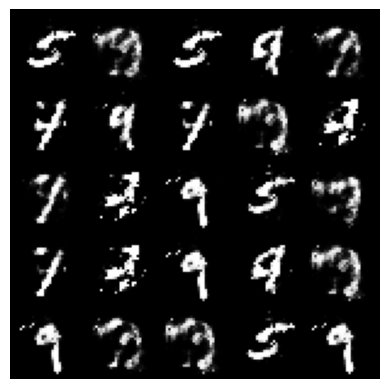

Epoch: 1000/2000 | G Loss: 0.69511 | D Loss: 1.3651
Epoch: 1010/2000 | G Loss: 0.70997 | D Loss: 1.4051
Epoch: 1020/2000 | G Loss: 0.69726 | D Loss: 1.3836
Epoch: 1030/2000 | G Loss: 0.69732 | D Loss: 1.3776
Epoch: 1040/2000 | G Loss: 0.68989 | D Loss: 1.3828
Epoch: 1050/2000 | G Loss: 0.71016 | D Loss: 1.3926
Epoch: 1060/2000 | G Loss: 0.69629 | D Loss: 1.3954
Epoch: 1070/2000 | G Loss: 0.69782 | D Loss: 1.402
Epoch: 1080/2000 | G Loss: 0.6954 | D Loss: 1.3834
Epoch: 1090/2000 | G Loss: 0.70427 | D Loss: 1.3815


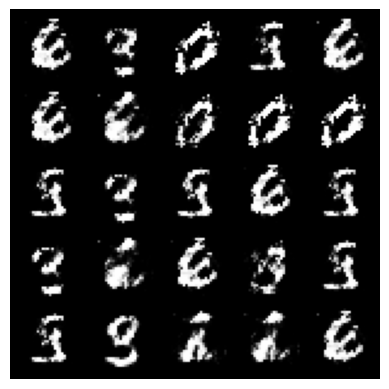

Epoch: 1100/2000 | G Loss: 0.71498 | D Loss: 1.3948
Epoch: 1110/2000 | G Loss: 0.69595 | D Loss: 1.409
Epoch: 1120/2000 | G Loss: 0.71645 | D Loss: 1.3822
Epoch: 1130/2000 | G Loss: 0.67752 | D Loss: 1.3779
Epoch: 1140/2000 | G Loss: 0.68911 | D Loss: 1.3732
Epoch: 1150/2000 | G Loss: 0.70696 | D Loss: 1.3798
Epoch: 1160/2000 | G Loss: 0.71325 | D Loss: 1.3852
Epoch: 1170/2000 | G Loss: 0.7053 | D Loss: 1.3918
Epoch: 1180/2000 | G Loss: 0.69723 | D Loss: 1.3935
Epoch: 1190/2000 | G Loss: 0.7079 | D Loss: 1.3783


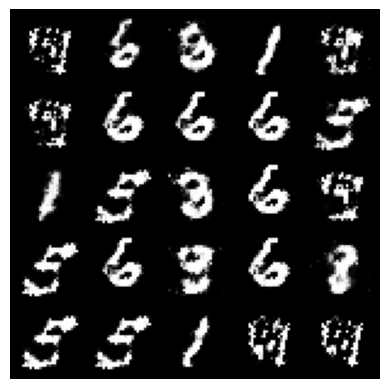

Epoch: 1200/2000 | G Loss: 0.69195 | D Loss: 1.3734
Epoch: 1210/2000 | G Loss: 0.71161 | D Loss: 1.3896
Epoch: 1220/2000 | G Loss: 0.71453 | D Loss: 1.3554
Epoch: 1230/2000 | G Loss: 0.68824 | D Loss: 1.3794
Epoch: 1240/2000 | G Loss: 0.69271 | D Loss: 1.3574
Epoch: 1250/2000 | G Loss: 0.69649 | D Loss: 1.3779
Epoch: 1260/2000 | G Loss: 0.72132 | D Loss: 1.3947
Epoch: 1270/2000 | G Loss: 0.71094 | D Loss: 1.3631
Epoch: 1280/2000 | G Loss: 0.71416 | D Loss: 1.3777
Epoch: 1290/2000 | G Loss: 0.69239 | D Loss: 1.3877


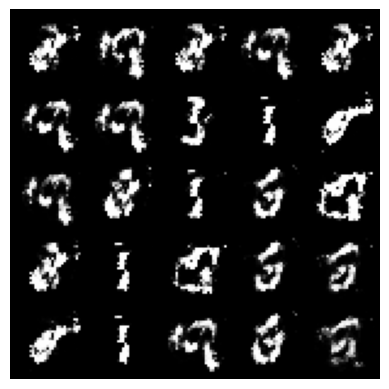

Epoch: 1300/2000 | G Loss: 0.71488 | D Loss: 1.354
Epoch: 1310/2000 | G Loss: 0.70761 | D Loss: 1.3884
Epoch: 1320/2000 | G Loss: 0.69459 | D Loss: 1.3887
Epoch: 1330/2000 | G Loss: 0.70536 | D Loss: 1.3895
Epoch: 1340/2000 | G Loss: 0.69795 | D Loss: 1.3856
Epoch: 1350/2000 | G Loss: 0.69016 | D Loss: 1.3947
Epoch: 1360/2000 | G Loss: 0.70142 | D Loss: 1.3687
Epoch: 1370/2000 | G Loss: 0.70362 | D Loss: 1.3882
Epoch: 1380/2000 | G Loss: 0.67466 | D Loss: 1.3833
Epoch: 1390/2000 | G Loss: 0.70029 | D Loss: 1.3856


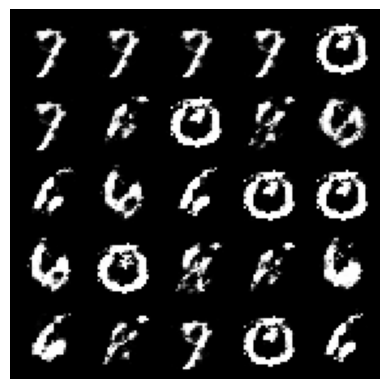

Epoch: 1400/2000 | G Loss: 0.71439 | D Loss: 1.3883
Epoch: 1410/2000 | G Loss: 0.68882 | D Loss: 1.3755
Epoch: 1420/2000 | G Loss: 0.69133 | D Loss: 1.3776
Epoch: 1430/2000 | G Loss: 0.703 | D Loss: 1.3807
Epoch: 1440/2000 | G Loss: 0.693 | D Loss: 1.3647
Epoch: 1450/2000 | G Loss: 0.71001 | D Loss: 1.3816
Epoch: 1460/2000 | G Loss: 0.71343 | D Loss: 1.3718
Epoch: 1470/2000 | G Loss: 0.70814 | D Loss: 1.3797
Epoch: 1480/2000 | G Loss: 0.71271 | D Loss: 1.3822
Epoch: 1490/2000 | G Loss: 0.69199 | D Loss: 1.3851


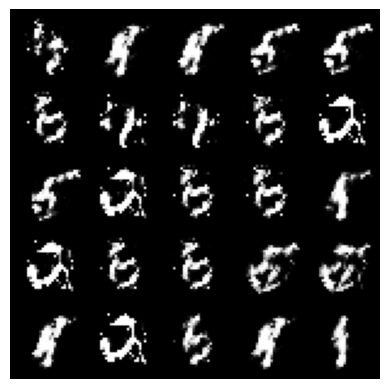

Epoch: 1500/2000 | G Loss: 0.71391 | D Loss: 1.3956
Epoch: 1510/2000 | G Loss: 0.70964 | D Loss: 1.3818
Epoch: 1520/2000 | G Loss: 0.6964 | D Loss: 1.3868
Epoch: 1530/2000 | G Loss: 0.70599 | D Loss: 1.384
Epoch: 1540/2000 | G Loss: 0.72047 | D Loss: 1.3686
Epoch: 1550/2000 | G Loss: 0.7005 | D Loss: 1.38
Epoch: 1560/2000 | G Loss: 0.69308 | D Loss: 1.3778
Epoch: 1570/2000 | G Loss: 0.7044 | D Loss: 1.3746
Epoch: 1580/2000 | G Loss: 0.69577 | D Loss: 1.384
Epoch: 1590/2000 | G Loss: 0.69984 | D Loss: 1.3862


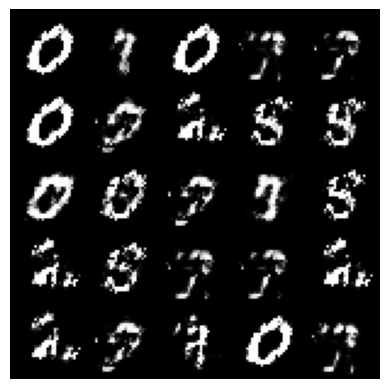

Epoch: 1600/2000 | G Loss: 0.726 | D Loss: 1.3811
Epoch: 1610/2000 | G Loss: 0.69765 | D Loss: 1.3962
Epoch: 1620/2000 | G Loss: 0.69448 | D Loss: 1.3654
Epoch: 1630/2000 | G Loss: 0.70876 | D Loss: 1.3787
Epoch: 1640/2000 | G Loss: 0.69955 | D Loss: 1.3875
Epoch: 1650/2000 | G Loss: 0.70482 | D Loss: 1.3894
Epoch: 1660/2000 | G Loss: 0.703 | D Loss: 1.3875
Epoch: 1670/2000 | G Loss: 0.68917 | D Loss: 1.3689
Epoch: 1680/2000 | G Loss: 0.70947 | D Loss: 1.3707
Epoch: 1690/2000 | G Loss: 0.67599 | D Loss: 1.3535


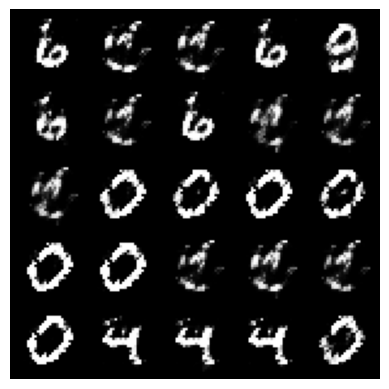

Epoch: 1700/2000 | G Loss: 0.70452 | D Loss: 1.3928
Epoch: 1710/2000 | G Loss: 0.6869 | D Loss: 1.3747
Epoch: 1720/2000 | G Loss: 0.68325 | D Loss: 1.3877
Epoch: 1730/2000 | G Loss: 0.71368 | D Loss: 1.3879
Epoch: 1740/2000 | G Loss: 0.73031 | D Loss: 1.3951
Epoch: 1750/2000 | G Loss: 0.69411 | D Loss: 1.3824
Epoch: 1760/2000 | G Loss: 0.70808 | D Loss: 1.3899
Epoch: 1770/2000 | G Loss: 0.71518 | D Loss: 1.3785
Epoch: 1780/2000 | G Loss: 0.71664 | D Loss: 1.3868
Epoch: 1790/2000 | G Loss: 0.67639 | D Loss: 1.3755


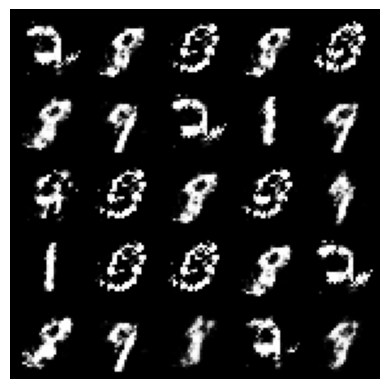

Epoch: 1800/2000 | G Loss: 0.70295 | D Loss: 1.387
Epoch: 1810/2000 | G Loss: 0.69066 | D Loss: 1.3896
Epoch: 1820/2000 | G Loss: 0.69161 | D Loss: 1.389
Epoch: 1830/2000 | G Loss: 0.73135 | D Loss: 1.3762
Epoch: 1840/2000 | G Loss: 0.69095 | D Loss: 1.381
Epoch: 1850/2000 | G Loss: 0.72485 | D Loss: 1.3675
Epoch: 1860/2000 | G Loss: 0.72106 | D Loss: 1.3711
Epoch: 1870/2000 | G Loss: 0.70301 | D Loss: 1.3891
Epoch: 1880/2000 | G Loss: 0.69442 | D Loss: 1.3898
Epoch: 1890/2000 | G Loss: 0.6966 | D Loss: 1.3896


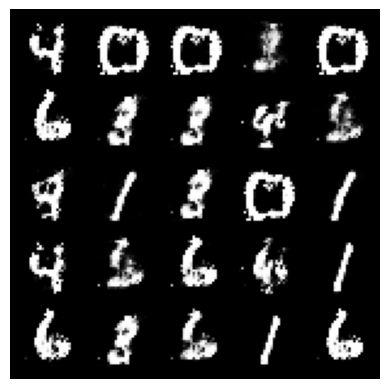

Epoch: 1900/2000 | G Loss: 0.69048 | D Loss: 1.3776
Epoch: 1910/2000 | G Loss: 0.6922 | D Loss: 1.3814
Epoch: 1920/2000 | G Loss: 0.70774 | D Loss: 1.3858
Epoch: 1930/2000 | G Loss: 0.70514 | D Loss: 1.3863
Epoch: 1940/2000 | G Loss: 0.6842 | D Loss: 1.3536
Epoch: 1950/2000 | G Loss: 0.70631 | D Loss: 1.3666
Epoch: 1960/2000 | G Loss: 0.68324 | D Loss: 1.3814
Epoch: 1970/2000 | G Loss: 0.69506 | D Loss: 1.3806
Epoch: 1980/2000 | G Loss: 0.69802 | D Loss: 1.3848
Epoch: 1990/2000 | G Loss: 0.69892 | D Loss: 1.3797


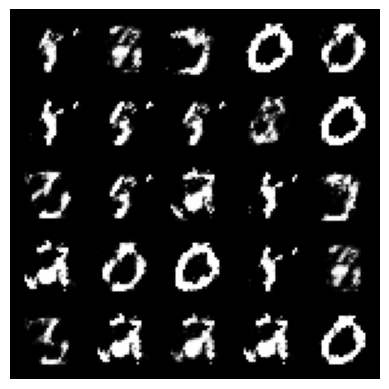

Epoch: 2000/2000 | G Loss: 0.68472 | D Loss: 1.3785


In [8]:
epochs = 2000
lr = 0.00001
noise_dim = 64

gen = Generator(indim=noise_dim).to(device)
disc = Discriminator().to(device)

gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

criterion = torch.nn.BCEWithLogitsLoss()

for i in range(epochs):
    losses = {
        'disc': 0,
        'gen': 0
    }
    c = 0
    for x, _ in train_loader:
        real = x.view(-1, 28*28).to(device)
        noise = random_noise(batch_size, dim=noise_dim, device=device)

                
        # Generator
        gen_opt.zero_grad()
        gen_loss, fake = gen_loss_fn(gen, disc, noise, criterion)
        gen_loss.backward(retain_graph=True)
        gen_opt.step()
        
        
        # Discriminator
        disc_opt.zero_grad()
        disc_loss = disc_loss_fn(disc, real, fake, criterion)
        disc_loss.backward(retain_graph=True)
        disc_opt.step()

        
        losses['disc'] += disc_loss.item()
        losses['gen'] += gen_loss.item()
        c += 1
    
    if (i+1) % 100 == 0:
        preds = gen(random_noise(25, dim=noise_dim, device=device))
        show_tensor_images(preds)
    
    if (i+1) % 10 == 0:
        print(f"Epoch: {i+1:4}/{epochs} | G Loss: {losses['gen']/c:.5} | D Loss: {losses['disc']/c:.5}")
    